# Altair: Statistical Visualization for Python

[Altair](http://github.com/altair-viz/altair/) provides a declarative Python API for statistical visualization, built on top of [Vega-Lite](http://vega.github.io/vega-lite/).

The notebooks listed here provide a set of tutorials and examples of Altair's use. For more complete documentation, see [Altair's Documentation](http://altair-viz.github.io/).

Please note that these notebooks assume Altair version 2.0 or later:

In [1]:
import altair
altair.__version__

'4.0.0'

## About Altair

Altair is built on [Vega-Lite](http://vega.github.io/vega-lite/). From the Vega-lite documentation:

> Vega-Lite specifications describe visualizations as mappings from data to properties of graphical marks (e.g., points or bars). It automatically produces visualization components including axes, legends, and scales. It then determines properties of these components based on a set of carefully designed rules. This approach allows Vega-Lite specifications to be succinct and expressive, but also provide user control. As Vega-Lite is designed for analysis, it supports data transformations such as aggregation, binning, filtering, sorting, and visual transformations including stacking and faceting.

The key feature of this declarative approach is that the user is free to think about the data, rather than the mechanics of the visualization. Vega-Lite specifications are expressed in JavaScript Object Notation (JSON), a cross-platform format often used for storage of nested and/or hierarchical data. Altair builds a Python layer on top of this, so that rather than writing raw JSON strings the user can write declarative Python code.

## Quick Altair example

Here is a quick example of the Altair API in action:

In [2]:
import altair as alt
from vega_datasets import data

cars = data.cars()

chart = alt.Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
)

chart

alt.Chart(...)

In most cases, the data passed to the ``Chart`` will be a standard Pandas dataframe, as we can see here:

In [3]:
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


Under the hood, Altair interprets the input and constructs a Python dictionary of the vega-lite specification (removing the data for clarity):

In [4]:
dct = chart.to_dict()
dct.pop('datasets')  # leave out dataset for clarity
dct

{'config': {'view': {'continuousWidth': 400, 'continuousHeight': 300}},
 'data': {'name': 'data-f02450ab61490a1363517a0190416235'},
 'mark': 'circle',
 'encoding': {'color': {'type': 'nominal', 'field': 'Origin'},
  'x': {'type': 'quantitative', 'field': 'Horsepower'},
  'y': {'type': 'quantitative', 'field': 'Miles_per_Gallon'}},
 '$schema': 'https://vega.github.io/schema/vega-lite/v4.0.0.json'}

When converted to JSON, this spec is exactly in the form expected by Vega-Lite.

## Comparison to Matplotlib

To clarify the declarative nature of Altair, we perform the same visualization with [Matplotlib](http://matplotlib.org/):

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

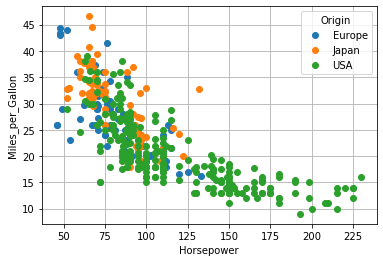

In [6]:
for origin, group in cars.groupby('Origin'):
    plt.plot(group['Horsepower'], group['Miles_per_Gallon'],
             'o', label=origin)
plt.legend(title='Origin')
plt.xlabel('Horsepower')
plt.ylabel('Miles_per_Gallon');
plt.grid(True)

With matplotlib, the user has to manually perform a group-by operation and label the axes and legend.
By contrast, with Altair's declarative approach, the user only has to specify *what* should happen, not *how*.

## Documentation

You can learn more about Altair at its documentation site:

- [Altair Documentation](http://altair-viz.github.io)

Additionally, it can be useful when using Altair to understand the Vega-Lite library that underlies it. Vega-Lite's documentation can be found here:

- [Vega-Lite Documentation](https://vega.github.io/vega-lite/docs/)

## Index of Notebooks

This repository contains a number of notebooks that provide a tutorial and examples of Altair's usage:

- [Tutorial](02-Tutorial.ipynb)
- [Scatter Charts](03-ScatterCharts.ipynb)
- [Bar Charts](04-BarCharts.ipynb)
- [Line Charts](05-LineCharts.ipynb)
- [Area Charts](06-AreaCharts.ipynb)
- [Layered Charts](07-LayeredCharts.ipynb)
- [Cars Dataset](08-CarsDataset.ipynb)
- [Example: Measles Data](09-Measles.ipynb)

If you are browsing these notebooks on Github or nbviewer, a live version of these notebooks is available by clicking on the following badge:

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/altair-viz/altair_notebooks/master?urlpath=lab/tree/notebooks/Index.ipynb)

In addition, you can see a number of Altair example plots in [Altair's example gallery](https://altair-viz.github.io/gallery/).